In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Loading the dataset
df = pd.read_csv('one_data.csv')

In [3]:
df.head()

,OFFCHIP_PLATINUM_78kHz_RESISTANCE,OFFCHIP_GOLD_78kHz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_CAPACITANCE,OFFCHIP_GOLD_200Hz_RESISTANCE,OFFCHIP_GOLD_200Hz_CAPACITANCE,OFFCHIP_COPPER_200Hz_RESISTANCE,OFFCHIP_COPPER_200Hz_CAPACITANCE,OFFCHIP_SILVER_200Hz_RESISTANCE,OFFCHIP_SILVER_200Hz_CAPACITANCE,OFFCHIP_NICKEL_200Hz_RESISTANCE,OFFCHIP_NICKEL_200Hz_CAPACITANCE,CLASS
0,2292.000,13980.000,1206.0000,-523.000,4698.000,-3925.0000,6757.0000,-3263.0000,11269.000,-3596.000,14611.000,-1492.000,10
1,2292.010,13980.007,1206.0200,-522.997,4697.983,-3925.0250,6757.0510,-3263.0340,11269.020,-3595.984,14611.002,-1492.000,10
2,2292.015,13980.014,1206.0400,-522.991,4697.965,-3925.0679,6757.0890,-3263.1040,11269.038,-3595.973,14611.001,-1492.000,10
3,2292.023,13980.020,1206.0599,-522.994,4697.960,-3925.1118,6757.1597,-3263.1820,11269.067,-3595.987,14611.004,-1492.005,10
4,2292.029,13980.027,1206.0889,-522.986,4697.949,-3925.1687,6757.3160,-3263.2507,11269.092,-3595.981,14611.006,-1492.003,10


In [4]:
# Checking the shape of the dataset
df.shape

(158400, 13)

In [5]:
# Checking for null/missing values
df.isnull().sum()

OFFCHIP_PLATINUM_78kHz_RESISTANCE     0
OFFCHIP_GOLD_78kHz_RESISTANCE         0
OFFCHIP_PLATINUM_200Hz_RESISTANCE     0
OFFCHIP_PLATINUM_200Hz_CAPACITANCE    0
OFFCHIP_GOLD_200Hz_RESISTANCE         0
OFFCHIP_GOLD_200Hz_CAPACITANCE        0
OFFCHIP_COPPER_200Hz_RESISTANCE       0
OFFCHIP_COPPER_200Hz_CAPACITANCE      0
OFFCHIP_SILVER_200Hz_RESISTANCE       0
OFFCHIP_SILVER_200Hz_CAPACITANCE      0
OFFCHIP_NICKEL_200Hz_RESISTANCE       0
OFFCHIP_NICKEL_200Hz_CAPACITANCE      0
CLASS                                 0
dtype: int64

In [6]:
#Checking the data types of the columns
df.dtypes

OFFCHIP_PLATINUM_78kHz_RESISTANCE     float64
OFFCHIP_GOLD_78kHz_RESISTANCE         float64
OFFCHIP_PLATINUM_200Hz_RESISTANCE     float64
OFFCHIP_PLATINUM_200Hz_CAPACITANCE    float64
OFFCHIP_GOLD_200Hz_RESISTANCE         float64
OFFCHIP_GOLD_200Hz_CAPACITANCE        float64
OFFCHIP_COPPER_200Hz_RESISTANCE       float64
OFFCHIP_COPPER_200Hz_CAPACITANCE      float64
OFFCHIP_SILVER_200Hz_RESISTANCE       float64
OFFCHIP_SILVER_200Hz_CAPACITANCE      float64
OFFCHIP_NICKEL_200Hz_RESISTANCE       float64
OFFCHIP_NICKEL_200Hz_CAPACITANCE      float64
CLASS                                   int64
dtype: object

In [7]:
# describing the dataframe
df.describe()

,OFFCHIP_PLATINUM_78kHz_RESISTANCE,OFFCHIP_GOLD_78kHz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_CAPACITANCE,OFFCHIP_GOLD_200Hz_RESISTANCE,OFFCHIP_GOLD_200Hz_CAPACITANCE,OFFCHIP_COPPER_200Hz_RESISTANCE,OFFCHIP_COPPER_200Hz_CAPACITANCE,OFFCHIP_SILVER_200Hz_RESISTANCE,OFFCHIP_SILVER_200Hz_CAPACITANCE,OFFCHIP_NICKEL_200Hz_RESISTANCE,OFFCHIP_NICKEL_200Hz_CAPACITANCE,CLASS
count,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000
mean,2576.209259,13127.255757,10064.665571,-4735.790962,6764.233199,-4225.721826,8309.397854,-2962.525442,9309.499310,-2444.917863,11733.212197,-2187.960495,6.875000
std,3548.988581,2294.100282,7056.864729,3344.504490,3623.041142,3146.082729,4986.671428,2267.912571,4129.482927,931.063091,3890.389500,1177.070614,3.479864
min,-1.000000,-1.000000,-1.000000,-11164.000000,-1.000000,-16038.000000,-1.000000,-17063.000000,-1.000000,-9495.000000,-1.000000,-5266.000000,0.000000
25%,1187.000000,11705.000000,1757.750000,-7498.000000,3963.000000,-5073.000000,4337.000000,-3466.000000,5914.000000,-2875.000000,9195.000000,-2708.000000,4.000000
50%,1396.000000,12726.000000,10351.000000,-5042.000000,6920.000000,-3023.000000,7683.000000,-2503.000000,8759.000000,-2347.000000,11863.000000,-1886.000000,8.000000
75%,3052.000000,15772.000000,15843.000000,-1000.000000,9207.000000,-2265.000000,12981.000000,-1659.000000,13253.000000,-1910.000000,15738.000000,-1362.000000,10.000000
max,26481.000000,16741.000000,23622.000000,-1.000000,16396.000000,-1.000000,23204.000000,-1.000000,24251.000000,-1.000000,17353.000000,-1.000000,10.000000


# Exploratory Data Analysis

With the help beautiful graphs, We are going to visualize the dataset to get better understanding about
the data and features of the dataset.

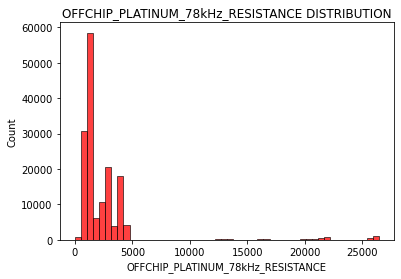

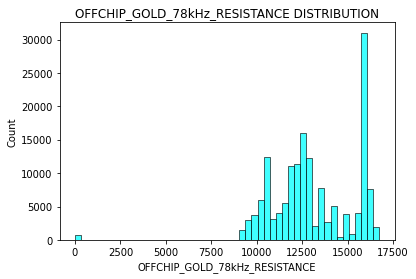

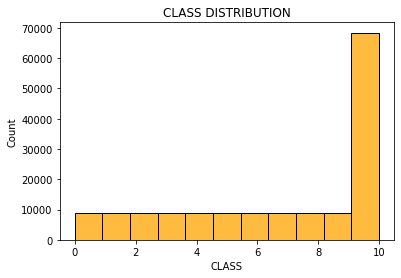

In [51]:
# bins -> No. of bars
sns.histplot(df.OFFCHIP_PLATINUM_78kHz_RESISTANCE, bins=50, kde=False, color='red')
plt.title('OFFCHIP_PLATINUM_78kHz_RESISTANCE DISTRIBUTION')
plt.xlabel('OFFCHIP_PLATINUM_78kHz_RESISTANCE')
plt.ylabel('Count')
plt.show()

sns.histplot(df.OFFCHIP_GOLD_78kHz_RESISTANCE, bins=50, kde=False, color='cyan')
plt.title('OFFCHIP_GOLD_78kHz_RESISTANCE DISTRIBUTION')
plt.xlabel('OFFCHIP_GOLD_78kHz_RESISTANCE')
plt.ylabel('Count')
plt.show()

sns.histplot(df.CLASS, bins=11, kde=False, color='orange')
plt.title('CLASS DISTRIBUTION')
plt.xlabel('CLASS')
plt.ylabel('Count')
plt.show()

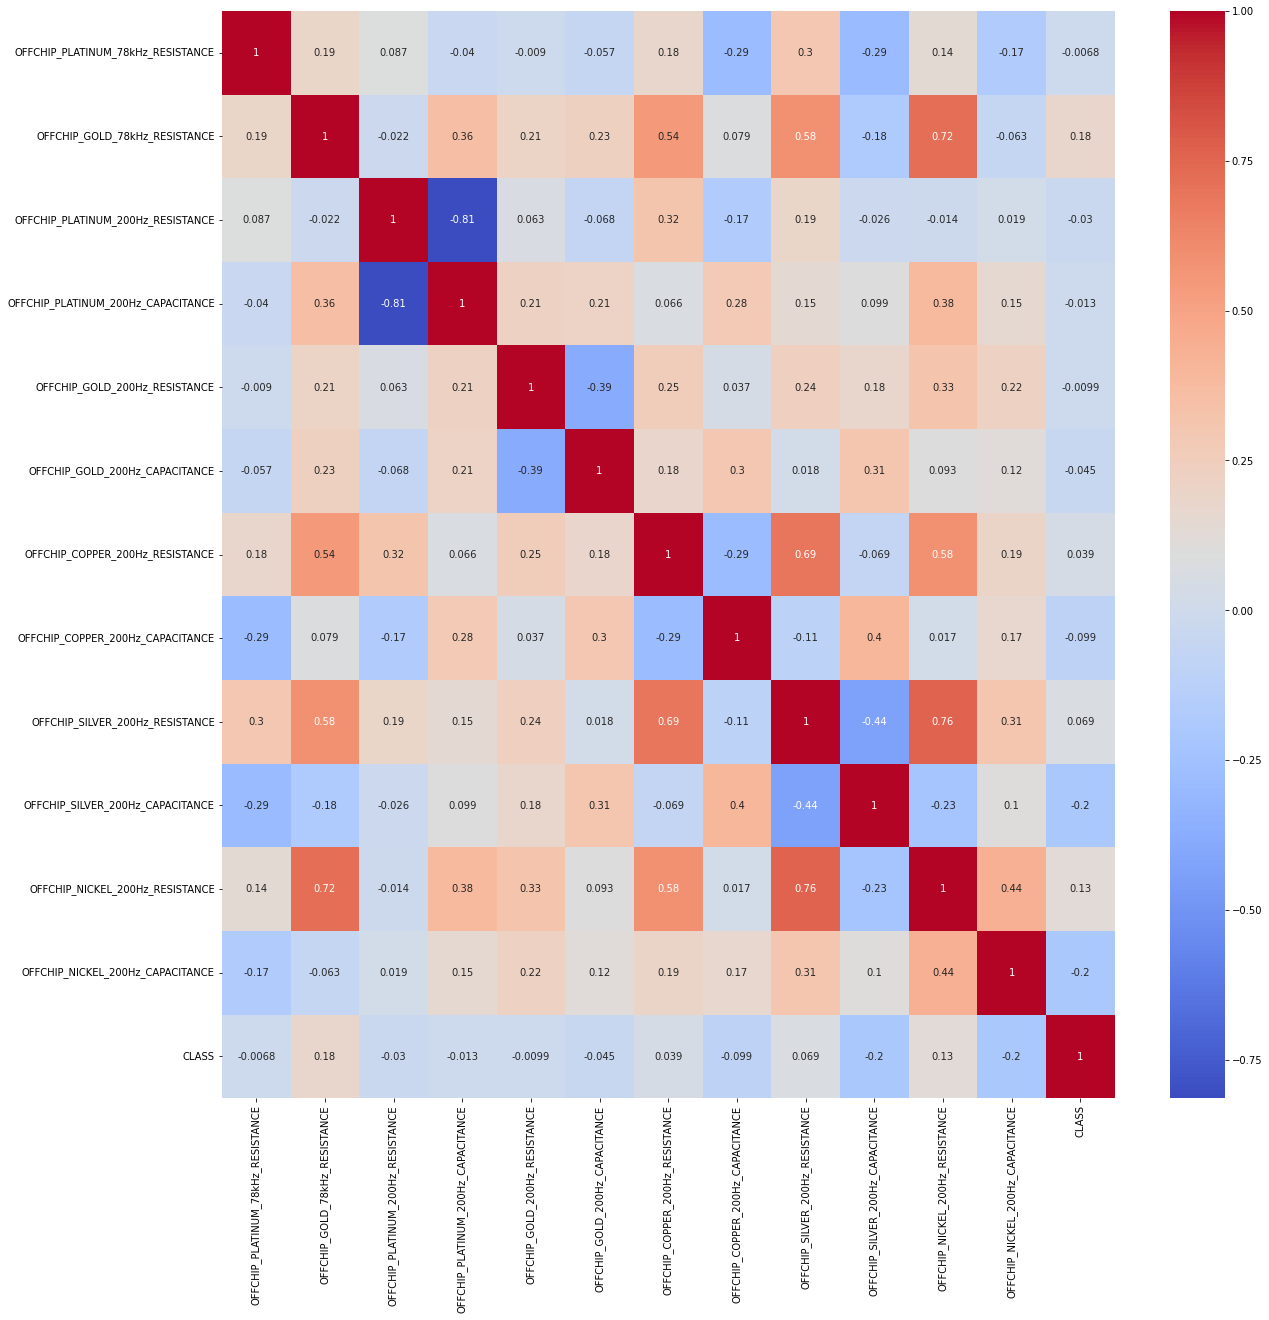

In [53]:
#plotting the coorelation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

## Preparing dataset for training and testing

In [8]:
# spiltting data into training and testing in (80/20 ratio)

x_train, x_test, y_train, y_test = train_test_split(df.drop('CLASS', axis=1), df['CLASS'], test_size=0.2, random_state=42)

## Model Building

### Random Forest Classifier

In [9]:
# Create a random forest classifier

rfc = RandomForestClassifier()

In [10]:
# Training the model using the training data
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [11]:
# Training Accuracy
rfc.score(x_train, y_train)

0.9590672348484849

In [12]:
# Predicting the model accuracy
rfc_pred = rfc.predict(x_test)

## Model Evaluation

### Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rfc_pred)
j = 0
for i in cm:
    print(i)
    print()
    
#     sns.heatmap(cm,
#             annot=True,
#             fmt='g',
#             xticklabels=[f'{j}',f'Not{j}'],
#             yticklabels=['Dog','Not Dog'])
#     plt.ylabel('Prediction',fontsize=13)
#     plt.xlabel('Actual',fontsize=13)
#     plt.title('Confusion Matrix',fontsize=17)
#     plt.show()
#     j += 1

# fig, ax = plt.subplots(1,2,figsize=(10,4))

# sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
# ax[1].set_xlabel('Predicted')
# ax[1].set_ylabel('Actual')

[1742    0    0    0    0    0    0    0    0    0    8]

[   0 1807    0    0    0    0    0    0    0    0    6]

[   0    0 1769    0    0    0    0    0    0    0    4]

[   0    0    0 1766    0    0    0    0    0    0    6]

[   1    0    0    0 1722    0    0    0    0    0    5]

[   0    0    0    0    0 1818    0    0    0    0    8]

[   0    0    0    0    0    0 1852    0    0    0    5]

[   0    0    0    0    0    0    0 1815    0    0    6]

[   0    0    0    0    0    1    0    0  351 1377    1]

[   0    0    0    0    0    1    0    0 1435  342    1]

[    0     0     1     0     0     4     0     0     0     0 13826]



In [14]:

x_test = [[4340, 15660, 2867, -633, 5416, -2756, 15462, -1412, 14523, -1942, 16817, -1401]]

x = rfc.predict(x_test)
x

C:\python 397\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### Classification Report

In [15]:
from sklearn.metrics import classification_report

print("Precision : ")
print(classification_report(y_test, rfc_pred))

Precision : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1750
           1       1.00      1.00      1.00      1813
           2       1.00      1.00      1.00      1773
           3       1.00      1.00      1.00      1772
           4       1.00      1.00      1.00      1728
           5       1.00      1.00      1.00      1826
           6       1.00      1.00      1.00      1857
           7       1.00      1.00      1.00      1821
           8       0.20      0.20      0.20      1730
           9       0.20      0.19      0.20      1779
          10       1.00      1.00      1.00     13831

    accuracy                           0.91     31680
   macro avg       0.85      0.85      0.85     31680
weighted avg       0.91      0.91      0.91     31680



### For Random Forest Classifier - Analysis

From the metrics provided:

For most of the classes (0 to 10), precision, recall, and F1-score are very high (close to 1.00), indicating that the model is performing exceptionally well for those classes.

For class 8 and class 9, precision, recall, and F1-score are relatively lower, suggesting that the model's performance is weaker for these classes.

**The accuracy of the model is around 91%**, which is the proportion of correctly classified instances overall.

The macro average and weighted average give you a sense of the overall model performance considering all classes. Macro average is around 0.85, which indicates a good overall performance across classes.

In summary, your model seems to be performing well for most classes, but there might be room for improvement for classes 8 and 9. Consider looking into ways to balance your class distribution and possibly fine-tuning your model to improve its performance for these classes.

| Tables        | R2 Score | MSE  | MAE |
| ------------- |----------| -----| ----|
|         nmiun |      iju | iun  | dsf |

### Another Method for checking precision -  R2 Score, Mean Squarred Error, Mean Absolute Error

In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Random Forest Classifier
print("Random Forest Classifier")
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))
print('\n')

Random Forest Classifier
R2 score:  0.9859169046680064
Mean Squared Error:  0.16957070707070707
Mean Absolute Error:  0.10006313131313131




#### R2 Score (Coefficient of Determination):

R2 score ranges from 0 to 1, where 1 indicates that the model perfectly predicts the target variable.
An R2 score of 0.9859 suggests that your model explains approximately 98.59% of the variance in the target variable compared to a simple mean-based model.
Mean Squared Error (MSE):

#### Mean Squared Error (MSE):

MSEmeasures the average squared difference between predicted values and actual values.
A smaller MSE value indicates that the model's predictions are closer to the actual values.
In your case, an MSE of 0.1699 means that, on average, the squared difference between the model's predictions and the actual values is 0.1699.

#### Mean Absolute Error (MAE):

MAE measures the average absolute difference between predicted values and actual values.
Similar to MSE, a smaller MAE value indicates that the model's predictions are closer to the actual values.
An MAE of 0.1001 means that, on average, the absolute difference between the model's predictions and the actual values is 0.1001.
Since these metrics are typically used for regression tasks, they might not give you a complete picture of how well your Random Forest classifier is performing for a multi-class classification problem.

## Want to try web app of this model ?
<a href="https://huggingface.co/spaces/abanand132/aqua-alert" target="_blank"> <img src="https://www.transparentpng.com/thumb/click-here-button/VbnO5J-click-here-button-free-transparent-png.png" width=150px alt="click here"> </a>